# 人工智能选股框架及经典算法简介


内容：机器学习往往遵循一些基本的流程，主要步骤包括：数据获取、特征提取、数据转换、模型训练、模型选择和模型预测。

数据获取可以通过数据库以及网络爬虫技术，途径日趋多元化。常用的Python库包括`pandas`用于数据处理，`BeautifulSoup`和`Scrapy`用于网络爬虫。特征提取基于人的经验和探索，优质的特征能够起到事半功倍的效果。数据转换包括缺失值填充、标准化和降维，`pandas`和`scikit-learn`提供了丰富的工具来实现这些操作。模型选择通常借助交叉验证和一系列评价指标，`scikit-learn`提供了多种模型评估工具，如混淆矩阵、ROC曲线等。


In [2]:
# 初始化
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import numpy as np
from sklearn.linear_model import Ridge, Lasso
from sklearn.metrics import r2_score
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from matplotlib.colors import ListedColormap
import warnings
from sklearn.ensemble import RandomForestClassifier
warnings.filterwarnings("ignore")

### Yahoo Finance 如何下载目标股票的数据

In [4]:
import yfinance as yf
def yhdownload_single_stock_data(ticker, frequency='1d', start=None, end=None):
    """
    下载股票数据并调整数据频率

    :param ticker: 股票代码
    :param frequency: 数据频率 ('1d', '1wk', '1mo')
    :param start: 开始日期 (格式 'YYYY-MM-DD')
    :param end: 结束日期 (格式 'YYYY-MM-DD')
    :return: 股票数据的DataFrame和财务特征
    """
    stock_data = yf.download(ticker, start=start, end=end, interval=frequency)
    return stock_data

# 使用示例
example_data = yhdownload_single_stock_data('600519.SS', frequency='1d', start='2020-01-01', end='2024-10-30')
example_data.tail(5)

[*********************100%***********************]  1 of 1 completed


Price,Adj Close,Close,High,Low,Open,Volume
Ticker,600519.SS,600519.SS,600519.SS,600519.SS,600519.SS,600519.SS
Date,,,,,,
2024-10-23 00:00:00+00:00,1567.500000,1567.500000,1576.949951,1532.00000,1544.109985,4008846
2024-10-24 00:00:00+00:00,1552.199951,1552.199951,1575.000000,1545.01001,1561.000000,2392280
2024-10-25 00:00:00+00:00,1558.849976,1558.849976,1574.790039,1546.01001,1547.000000,2774508
2024-10-28 00:00:00+00:00,1565.000000,1565.000000,1565.000000,1522.22998,1560.000000,3912140
2024-10-29 00:00:00+00:00,1531.619995,1531.619995,1580.000000,1530.00000,1560.000000,4116578


### Ashare API 下载行情数据 （可以支持1min级）
Credit to https://github.com/mpquant/Ashare/tree/main

In [6]:
from  Ashare import *
    
# 证券代码兼容多种格式 通达信，同花顺，聚宽
# sh000001 (000001.XSHG)    sz399006 (399006.XSHE)   sh600519 ( 600519.XSHG ) 

df=get_price('sh000001',frequency='1d',count=5)      #默认获取今天往前5天的日线实时行情
print('上证指数日线行情\n',df)

df=get_price('000001.XSHG',frequency='1w',count=5,end_date='2024-04-30')  #可以指定结束日期，获取历史行情
print('上证指数历史行情\n',df)                        

df=get_price('000001.XSHG',frequency='1w',count=5,end_date='2018-06-15')  #支持'1d'日, '1w'周,  '1M'月  
print('上证指数历史周线\n',df) 

df=get_price('sh600519',frequency='15m',count=5)     #分钟线实时行情，可用'1m','5m','15m','30m','60m'
print('贵州茅台15分钟线\n',df)

df=get_price('600519.XSHG',frequency='60m',count=6)  #分钟线实时行情，可用'1m','5m','15m','30m','60m'
print('贵州茅台60分钟线\n',df)

上证指数日线行情
                 open      high       low     close        volume
                                                                
2024-11-06  3395.222  3420.999  3367.081  3383.806  8.958559e+10
2024-11-07  3359.985  3470.661  3356.258  3470.661  9.595567e+10
2024-11-08  3502.133  3509.818  3443.193  3452.297  9.640346e+10
2024-11-11  3432.367  3471.122  3416.727  3470.066  8.180254e+10
2024-11-12  3469.891  3489.424  3402.042  3421.970  8.179265e+10
上证指数历史行情
                 open      high       low     close        volume
                                                                
2024-04-03  3049.021  3085.537  3049.021  3069.296  1.105909e+11
2024-04-12  3057.326  3077.351  3009.897  3019.474  1.760543e+11
2024-04-19  3013.672  3102.553  2995.542  3065.261  2.114533e+11
2024-04-26  3059.065  3092.430  3016.517  3088.636  1.719738e+11
2024-04-30  3086.682  3123.288  3080.586  3104.825  9.471387e+10
上证指数历史周线
                 open      high       low     close        vo

### AKShare API 数据库（股票基本面信息）

In [8]:
import akshare as ak

stock_financial_abstract_ths_df = ak.stock_financial_abstract_ths(symbol="000063", indicator="按报告期")
stock_financial_abstract_ths_df.head(3)

,报告期,净利润,净利润同比增长率,扣非净利润,扣非净利润同比增长率,营业总收入,营业总收入同比增长率,基本每股收益,每股净资产,每股资本公积金,...,净资产收益率-摊薄,营业周期,存货周转率,存货周转天数,应收账款周转天数,流动比率,速动比率,保守速动比率,产权比率,资产负债率
0,2024-09-30,79.06亿,0.83%,68.98亿,-2.86%,900.45亿,0.73%,1.6500,15.12,5.74,...,10.93%,268.24,1.31,205.78,62.46,1.90,1.22,1.13,1.76,63.63%
1,2024-06-30,57.32亿,4.76%,49.64亿,1.11%,624.87亿,2.94%,1.2000,14.72,5.74,...,8.14%,258.74,0.91,198.61,60.13,1.91,1.28,1.21,1.91,65.57%
2,2024-03-31,27.41亿,3.74%,26.49亿,7.93%,305.78亿,4.93%,0.5700,14.82,5.80,...,3.87%,269.99,0.43,210.18,59.81,1.96,1.37,1.27,1.94,65.82%


# 数据处理：缺失值或0值查找，应对极值，标准化，降维
在正式训练之前，需要对数据进行转换。

#### 缺失值处理：
1. 用缺失值前一个日期的值填充
2. 如果缺失值前一日也缺失，则用近N日的移动窗口均值填充
3. 如果不是时间序列，而是某些面板数据中的独立对象，且发生缺失的情况是随机的，非系统性的。那么可以考虑删去缺失的对象

#### 极值处理：
1. IQR四分位数方法寻找极值，计算四分位数间距 IQR，将 Q1 - 1.5 * IQR 和 Q3 + 1.5 * IQR 之外的值视为异常
2. MAD 方法 计算每个值与中位数的绝对偏差，并以倍数为基准（通常为 3 或 3.5）来确定是否为异常值。这个方法更适合于数据存在非正态分布的情况
3. Z-score 方法 计算每个值距离平均值的标准差倍数，通常以 3 个标准差为阈值。适用于近似正态分布的数据
4. Winsorizing 是通过将异常值替换为接近边界的值（例如，5% 和 95% 的分位数），使数据在一定范围内。适合在保留数据极值结构的情况下削弱异常影响

#### 标准化：
1. Z-score 标准化 （注意避免未来信息）
2. Rank 秩

#### 降维：
1. PCA
2. 偏最小二乘法
3. Fisher线性判别

In [10]:
# 读取示例数据库 (包含了 000002.XSHE 和 000001.XSHE 两个票，从 2020年1月2日 至 2020年12月31日 的基本面信息（日度））
df = pd.read_excel('example_data.xlsx')
df.tail(5)

,order_book_id,date,pe_ratio_ttm,pb_ratio_ttm,peg_ratio_ttm,ps_ratio_ttm,market_cap_3,ev_ttm,ev_to_ebitda_ttm,pcf_ratio_ttm,...,net_profit_margin_ttm,inc_revenue_ttm,inc_return_on_equity_ttm,inc_book_per_share_ttm,operating_profit_growth_ratio_ttm,net_profit_parent_company_growth_ratio_ttm,net_operate_cash_flow_growth_ratio_ttm,net_investing_cash_flow_growth_ratio_ttm,net_financing_cash_flow_growth_ratio_ttm,ret_next
1,000001.XSHE,2020-01-02,11.699169,1.264427,0.820785,2.461302,3.273778e+11,3.630269e+12,99.894584,8.510615,...,0.210383,0.181072,0.002607,0.00829,0.143414,0.142536,0.378894,-2.623341,-1.971541,0.018376
2,000002.XSHE,2020-01-03,9.525237,2.258293,0.416127,1.048215,3.622337e+11,1.704579e+12,19.023728,5.930113,...,0.162238,0.144965,0.000000,0.15250,0.259328,0.228902,0.531481,-0.912307,-1.883127,-0.016849
3,000001.XSHE,2020-01-03,11.914151,1.287662,0.835868,2.506531,3.333937e+11,3.636285e+12,100.060123,8.667005,...,0.210383,0.181072,0.002607,0.00829,0.143414,0.142536,0.378894,-2.623341,-1.971541,-0.006403
4,000002.XSHE,2020-01-06,9.364749,2.220243,0.409116,1.030554,3.561305e+11,1.698476e+12,18.955615,5.830199,...,0.162238,0.144965,0.074316,0.15250,0.259328,0.228902,0.531481,-0.912307,-1.883127,0.007934
5,000001.XSHE,2020-01-06,11.837867,1.279417,0.830516,2.490482,3.312590e+11,3.634150e+12,100.001383,8.611512,...,0.210383,0.181072,0.002607,0.00829,0.143414,0.142536,0.378894,-2.623341,-1.971541,0.004687


#### 展示有缺失值或0值对应的对象名和列名组合 （股票代码，股票特征）

In [12]:
def find_missing_or_zero_combinations(df, mode="both"):
    """
    查找包含缺失值或0值的对象名称和列名称组合。
    
    参数:
    - df: 输入的DataFrame
    - mode: 查找模式
      - "missing"：只查找缺失值
      - "zero"：只查找0值
      - "both"：查找缺失值或0值（默认）
    
    返回:
    - 包含唯一对象名称和列名称组合的DataFrame
    """
    object_name_column = df.columns[0]  # 假设第一列是对象名称

    # 转换为长格式
    df_long = df.melt(id_vars=[object_name_column], var_name="Column Name", value_name="Value")

    # 根据模式选择过滤条件
    if mode == "missing":
        filtered_df = df_long[df_long["Value"].isna() | (df_long["Value"] == '--')]
    elif mode == "zero":
        filtered_df = df_long[df_long["Value"] == 0]
    elif mode == "both":
        filtered_df = df_long[(df_long["Value"].isna()) | (df_long["Value"] == 0) | (df_long["Value"] == '--')]
    else:
        raise ValueError("mode 参数必须是 'missing'、'zero' 或 'both'")
    
    # 提取唯一的 Object Name 和 Column Name 组合
    unique_combinations = filtered_df[[object_name_column, "Column Name"]].drop_duplicates().reset_index(drop=True)
    
    return unique_combinations

# 使用示例
# 查找缺失值或0值的组合
missing_or_zero_combinations = find_missing_or_zero_combinations(df, mode="both")
display(missing_or_zero_combinations)

,order_book_id,Column Name
0,000001.XSHE,current_ratio_ttm
1,000001.XSHE,return_on_invested_capital_ttm
2,000002.XSHE,inc_return_on_equity_ttm


In [13]:
def process_outliers_and_standardize(data, column_name):
    """
    对指定列进行极值截断和 Z-score 标准化。
    
    参数:
    - data: DataFrame 数据框
    - column_name: str 要处理的列名
    
    输出:
    - DataFrame，包含原始列和标准化后的新列，列名为 's_' + column_name
    """
    # 1. 计算 1% 和 99% 分位数
    q5 = data[column_name].quantile(0.05)
    q95 = data[column_name].quantile(0.95)
    
    # 2. 极值截断
    data[f'c_{column_name}'] = data[column_name].clip(lower=q5, upper=q95)
    
    # 3. Z-score 标准化
    scaler = StandardScaler()
    data[f's_{column_name}'] = scaler.fit_transform(data[[f'c_{column_name}']])
    
    # 返回处理后的 DataFrame
    return data

# 经典算法
我们从最简单的线性回归模型开始，介绍包括线性回归、岭回归、Lasso 回归、逻辑回归、线性判别分析和二次判别分析、支持向量机、决策树、 随机森林、 AdaBoost、神经网络、 深度学习和 K 最近邻算法在内的众多监督学习方法。

### 数据准备：中证1000成分股

In [16]:
# 我们使用23年底的PE, ROE, 预测PEG, 全市值，现金分红比例; 以及24年初至今以来的收益率（截止11月12日）
data = pd.read_excel('example_1000.xlsx')
data['AllSize_23'] = np.log(data['AllSize_23'])
display(data.head(10))

,Ticker,Name,PE(TTM)_23,ROE(TTM)_23,Predict_PEG_23,AllSize_23,Cash_payout_23,Ret_24
0,000001.SZ,平安银行,3.685732,10.409136,0.380475,7.488453,30.0352,34.5551
1,000002.SZ,万 科A,6.324935,7.570314,-0.970777,7.099175,--,-12.1415
2,000009.SZ,中国宝安,23.937629,12.793799,--,5.708804,15.3431,-9.5980
3,000012.SZ,南 玻A,9.245148,13.367806,-1.369967,5.143677,46.3679,5.8152
4,000021.SZ,深科技,46.534950,4.884797,2.227112,5.508290,31.4732,39.8533
5,000027.SZ,深圳能源,8.700576,7.11579,--,5.704420,32.554,9.5785
6,000031.SZ,大悦城,-3.600551,-23.471664,0.413265,4.829596,--,11.4478
7,000032.SZ,深桑达A,250.577594,1.584349,0.354944,5.453222,37.9733,4.3870
8,000034.SZ,神州数码,16.681518,14.292711,0.688894,5.277362,24.8763,29.5650
9,000035.SZ,中国天楹,38.640466,3.068275,0.052999,4.827729,14.8679,13.4487


### 单因子线性回归 （Return ~ EP因子) 单一自变量很难对因变量进行有效的预测 
### 当前R-square = 0.001

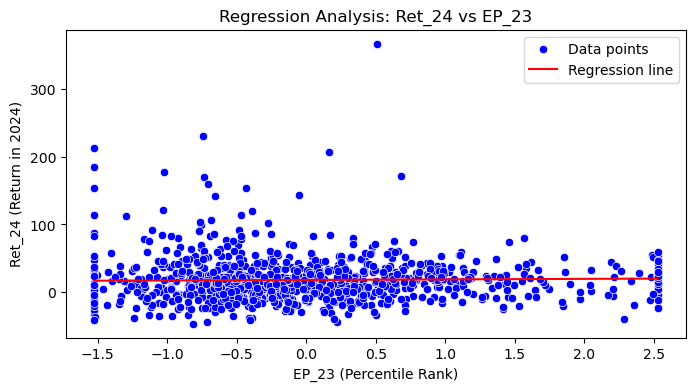

                            OLS Regression Results                            
Dep. Variable:                 Ret_24   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.5443
Date:                Wed, 13 Nov 2024   Prob (F-statistic):              0.461
Time:                        00:59:30   Log-Likelihood:                -4921.1
No. Observations:                1000   AIC:                             9846.
Df Residuals:                     998   BIC:                             9856.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                                      coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------------
const     

In [18]:
# 构造 EP 因子
# 1. 取倒数（避免除以零的情况）
data['Inverse_PE(TTM)_23'] = 1 / data['PE(TTM)_23'].replace(0, float('nan'))

# 2. 对极值进行截断（Winsorization）
# 计算 5 分位数和 95 分位数
q5 = data['Inverse_PE(TTM)_23'].quantile(0.05)
q95 = data['Inverse_PE(TTM)_23'].quantile(0.95)

# 将 5% 以下的值替换为 q5，95% 以上的值替换为 q95
data['Inverse_PE(TTM)_23'] = data['Inverse_PE(TTM)_23'].clip(lower=q5, upper=q95)

# 3. 标准化
scaler = StandardScaler()
data['Standardized_Inverse_PE(TTM)_23'] = scaler.fit_transform(data[['Inverse_PE(TTM)_23']])


# 设定自变量和因变量
X = data['Standardized_Inverse_PE(TTM)_23']
Y = data['Ret_24']
X_with_constant = sm.add_constant(X)

# 使用 OLS 进行回归
model = sm.OLS(Y, X_with_constant).fit()
predictions = model.predict(X_with_constant)

# 绘制散点图和回归线
plt.figure(figsize=(8,4))
sns.scatterplot(x=X, y=Y, color='blue', label="Data points")
sns.lineplot(x=X, y=predictions, color='red', label="Regression line")
plt.title('Regression Analysis: Ret_24 vs EP_23')
plt.xlabel('EP_23 (Percentile Rank)')
plt.ylabel('Ret_24 (Return in 2024)')
plt.legend()
plt.show()

# 查看回归模型的摘要信息
print(model.summary())


### 多元线性回归 (Return ~ 一系列标准化后的基本面因子） 效果优于单元回归, 当前R-square = 0.04

In [20]:
# 删除数据缺失的股票（这里为了示例，简单对数据集操作，在实际因子模型中，往往存在缺失数据的对象有系统性原因，需要慎重考虑删除的后果）
del_ticker = set(find_missing_or_zero_combinations(data, mode="both")['Ticker'])
data = data[~data['Ticker'].isin(del_ticker)]
# 构造标准化因子
process_outliers_and_standardize(data, 'PE(TTM)_23') # return data['s_PE(TTM)_23']
process_outliers_and_standardize(data, 'ROE(TTM)_23')
process_outliers_and_standardize(data, 'Predict_PEG_23')
process_outliers_and_standardize(data, 'AllSize_23')
process_outliers_and_standardize(data, 'Cash_payout_23')
display(data.head(3))

,Ticker,Name,PE(TTM)_23,ROE(TTM)_23,Predict_PEG_23,AllSize_23,Cash_payout_23,Ret_24,Inverse_PE(TTM)_23,Standardized_Inverse_PE(TTM)_23,c_PE(TTM)_23,s_PE(TTM)_23,c_ROE(TTM)_23,s_ROE(TTM)_23,c_Predict_PEG_23,s_Predict_PEG_23,c_AllSize_23,s_AllSize_23,c_Cash_payout_23,s_Cash_payout_23
0,000001.SZ,平安银行,3.685732,10.409136,0.380475,7.488453,30.0352,34.5551,0.160625,2.527729,3.777368,-1.004149,10.409136,-0.076305,0.380475,-0.010000,7.488453,2.134203,30.0352,-0.490683
3,000012.SZ,南 玻A,9.245148,13.367806,-1.369967,5.143677,46.3679,5.8152,0.108165,1.336656,9.245148,-0.784159,13.367806,0.360886,-1.369967,-1.124723,5.143677,-0.897105,46.3679,0.288869
4,000021.SZ,深科技,46.534950,4.884797,2.227112,5.508290,31.4732,39.8533,0.021489,-0.631240,46.534950,0.716149,4.884797,-0.892616,2.227112,1.165981,5.508290,-0.425736,31.4732,-0.422048


In [21]:
# 多元回归
# 自变量列表
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23', 's_Predict_PEG_23', 's_AllSize_23', 's_Cash_payout_23']]
Y = data['Ret_24']  # 因变量

# 添加常数项（截距）
X = sm.add_constant(X)

# 使用 OLS 进行多元回归
model = sm.OLS(Y, X).fit()

# 查看回归结果
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                 Ret_24   R-squared:                       0.040
Model:                            OLS   Adj. R-squared:                  0.034
Method:                 Least Squares   F-statistic:                     7.008
Date:                Wed, 13 Nov 2024   Prob (F-statistic):           1.99e-06
Time:                        00:59:30   Log-Likelihood:                -4066.7
No. Observations:                 846   AIC:                             8145.
Df Residuals:                     840   BIC:                             8174.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const               17.2030      1.022  

### Ridge and Lasso 回归  当前R-square = 0.04
在普通最小二乘法中，我们不对模型系数 w 作任何的先验假定。事实上， w 不可能取极大的正数或极小的负数；并且，在特征较多的情形下，很可能只有少数的几个特征具有预测效力。因此我们引入正则化（regularization）的重要思想，在最小二乘法损失函数的后面加入惩罚项。当惩罚项为系数 w 的平方和时，这种回归方法称为岭回归（ridge regression，又称为 L2 正则化）。当惩罚项为系数 w 的绝对值之和时， 这种回归方法称为 Lasso 回归（又称为 L1 正则化）。
#### 正则化的意义在于：
首先，岭回归和 Lasso 回归对病态数据的拟合强于线性回归。想象一个最极端的状态，回归模型中有两个特征完全相等，那么普通最小二乘法是无解的，但是岭回归和 Lasso 回归可以进行拟合。其次，正则化可以遴选出更少的特征，即大多数系数为 0，并且避免系数值过大的情形发生。 相较于岭回归， Lasso 回归的惩罚力度更强，更有利于选出比较稀疏的若干个特征。

In [23]:
# 假设你的 DataFrame 叫做 data，并且已经包含标准化的列
# 自变量和因变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23', 's_Predict_PEG_23', 's_AllSize_23', 's_Cash_payout_23']]
Y = data['Ret_24']  # 因变量

# 1. 普通 OLS 回归
X_with_const = sm.add_constant(X)  # 添加常数项
ols_model = sm.OLS(Y, X_with_const).fit()
ols_coefs = pd.Series(ols_model.params[1:], index=X.columns)  # 忽略截距项
ols_r2 = ols_model.rsquared

# 2. Ridge 回归
ridge_model = Ridge(alpha=2.0)  # 设置 alpha，可以调整
ridge_model.fit(X, Y)
ridge_coefs = pd.Series(ridge_model.coef_, index=X.columns)
ridge_r2 = r2_score(Y, ridge_model.predict(X))

# 3. Lasso 回归
lasso_model = Lasso(alpha=1.0)  # 设置 alpha，可以调整
lasso_model.fit(X, Y)
lasso_coefs = pd.Series(lasso_model.coef_, index=X.columns)
lasso_r2 = r2_score(Y, lasso_model.predict(X))

# 将三个模型的系数整理成一个 DataFrame
coef_df = pd.DataFrame({
    'OLS Coefficients': ols_coefs,
    'Ridge Coefficients': ridge_coefs,
    'Lasso Coefficients': lasso_coefs
})

# 添加 R^2 值作为新的一行
coef_df.loc['R^2'] = [ols_r2, ridge_r2, lasso_r2]

styled_df = coef_df.style.background_gradient(cmap='Blues', axis=1)
styled_df


,OLS Coefficients,Ridge Coefficients,Lasso Coefficients
s_PE(TTM)_23,-1.690412,-1.681483,-0.251125
s_ROE(TTM)_23,-5.429306,-5.411519,-3.806884
s_Predict_PEG_23,-0.366035,-0.365181,-0.000000
s_AllSize_23,3.784027,3.772974,2.655643
s_Cash_payout_23,-1.047230,-1.046218,-0.173018
R^2,0.040043,0.040042,0.034384


### 分类问题：逻辑回归

Optimization terminated successfully.
         Current function value: 0.654335
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:      Ret_24_above_mean   No. Observations:                  592
Model:                          Logit   Df Residuals:                      586
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.05318
Time:                        00:59:30   Log-Likelihood:                -387.37
converged:                       True   LL-Null:                       -409.12
Covariance Type:            nonrobust   LLR p-value:                 2.908e-08
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.1500      0.086     -1.751      0.080      -0.318       0.018
s_PE(TTM)_2

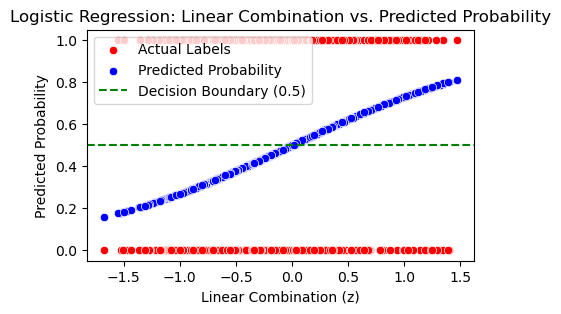

In [25]:

# 假设 DataFrame `data` 已包含 Ret_24 和自变量
# 自变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23', 's_Predict_PEG_23', 's_AllSize_23', 's_Cash_payout_23']]

# Step 1: 计算 Ret_24 的均值
ret_24_mean = data['Ret_24'].mean()

# Step 2: 创建二元分类标签
# 如果 Ret_24 大于均值，则标记为 1，否则标记为 0
data['Ret_24_above_mean'] = (data['Ret_24'] > ret_24_mean).astype(int)
Y = data['Ret_24_above_mean']  # 因变量

# Step 3: 添加常数项
X_with_const = sm.add_constant(X)

# Step 4: 拆分训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X_with_const, Y, test_size=0.3, random_state=42)

# Step 5: 拟合逻辑回归模型
logit_model = sm.Logit(Y_train, X_train).fit()

# 输出模型摘要
print(logit_model.summary())

# Step 6: 在测试集上进行预测
# 将预测的概率大于或等于 0.5 的样本视为 1，否则视为 0
Y_pred_test = logit_model.predict(X_test) >= 0.5

# Step 7: 输出模型评估结果
print("Accuracy on Test Set:", accuracy_score(Y_test, Y_pred_test))
print("\nClassification Report on Test Set:\n", classification_report(Y_test, Y_pred_test))

# Step 8: 计算整个数据集的线性组合值和预测概率
linear_combination = logit_model.predict(X_with_const, linear=True)  # 线性组合值
predicted_probabilities = logit_model.predict(X_with_const)          # 预测概率

# Step 9: 绘制线性组合值与预测概率的关系图
plt.figure(figsize=(5, 3))
sns.scatterplot(x=linear_combination, y=Y, color='red', label='Actual Labels')
sns.scatterplot(x=linear_combination, y=predicted_probabilities, color='blue', label='Predicted Probability')
plt.xlabel('Linear Combination (z)')
plt.ylabel('Predicted Probability')
plt.title('Logistic Regression: Linear Combination vs. Predicted Probability')
plt.axhline(0.5, color='green', linestyle='--', label='Decision Boundary (0.5)')
plt.legend()
plt.show()


### 多组分类：有序多分类

In [27]:

# Step 1: 按涨跌幅将目标变量 Ret_24 分成三类
# 1/3 分位数以下为 y=0, 中间 1/3 为 y=1, 最后 1/3 为 y=2
ret_quantiles = data['Ret_24'].quantile([1/3, 2/3])
data['Y'] = np.where(data['Ret_24'] <= ret_quantiles.iloc[0], 0,
                     np.where(data['Ret_24'] <= ret_quantiles.iloc[1], 1, 2))

# Step 2: 定义两个二分类问题
# 模型 1: 预测 P(Y <= 0) （Y=0 为一类，Y=1 和 Y=2 为另一类）
data['Y_0'] = (data['Y'] <= 0).astype(int)

# 模型 2: 预测 P(Y <= 1) （Y=0 和 Y=1 为一类，Y=2 为另一类）
data['Y_1'] = (data['Y'] <= 1).astype(int)

# Step 3: 添加常数项到自变量 X
X_with_const = sm.add_constant(X)

# Step 4: 拟合第一个二分类逻辑回归模型
logit_model_1 = sm.Logit(data['Y_0'], X_with_const).fit()
print("Model 1 Summary: P(Y <= 0)")
print(logit_model_1.summary())

# Step 5: 拟合第二个二分类逻辑回归模型
logit_model_2 = sm.Logit(data['Y_1'], X_with_const).fit()
print("\nModel 2 Summary: P(Y <= 1)")
print(logit_model_2.summary())

# Step 6: 预测各类别的概率
# P(Y <= 0) 从模型 1 预测得到
prob_Y_0 = logit_model_1.predict(X_with_const)

# P(Y <= 1) 从模型 2 预测得到
prob_Y_1 = logit_model_2.predict(X_with_const)

# P(Y = 2) = 1 - P(Y <= 1)
prob_Y_2 = 1 - prob_Y_1

# P(Y = 1) = P(Y <= 1) - P(Y <= 0)
prob_Y_1_only = prob_Y_1 - prob_Y_0

# 创建一个 DataFrame 来保存预测的概率
predicted_probs = pd.DataFrame({
    'P(Y=0)': prob_Y_0,
    'P(Y=1)': prob_Y_1_only,
    'P(Y=2)': prob_Y_2
})

# 输出预测的概率
print("\nPredicted Probabilities for Each Class:")
print(predicted_probs.head())


Optimization terminated successfully.
         Current function value: 0.593254
         Iterations 5
Model 1 Summary: P(Y <= 0)
                           Logit Regression Results                           
Dep. Variable:                    Y_0   No. Observations:                  846
Model:                          Logit   Df Residuals:                      840
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.06796
Time:                        00:59:31   Log-Likelihood:                -501.89
converged:                       True   LL-Null:                       -538.49
Covariance Type:            nonrobust   LLR p-value:                 2.212e-14
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7702      0.078     -9.814      0.000      -0.

### 多组分类：One-vs-Rest分类

In [29]:

# 假设你的 DataFrame `data` 已包含 Ret_24 和自变量 X
# Step 1: 将 Ret_24 按分位数分成三类
ret_quantiles = data['Ret_24'].quantile([1/3, 2/3])
data['Y'] = np.where(data['Ret_24'] <= ret_quantiles.iloc[0], 0,
                     np.where(data['Ret_24'] <= ret_quantiles.iloc[1], 1, 2))

# Step 2: 定义三个 OvR 二分类问题
# 模型 1: 预测 P(Y = 0) vs. P(Y ≠ 0)
data['Y_0'] = (data['Y'] == 0).astype(int)

# 模型 2: 预测 P(Y = 1) vs. P(Y ≠ 1)
data['Y_1'] = (data['Y'] == 1).astype(int)

# 模型 3: 预测 P(Y = 2) vs. P(Y ≠ 2)
data['Y_2'] = (data['Y'] == 2).astype(int)

# 添加常数项到自变量 X
X_with_const = sm.add_constant(X)

# Step 3: 拟合三个二分类逻辑回归模型
# 模型 1: 预测 Y=0 的概率
logit_model_1 = sm.Logit(data['Y_0'], X_with_const).fit()
print("Model 1 Summary: P(Y = 0)")
print(logit_model_1.summary())

# 模型 2: 预测 Y=1 的概率
logit_model_2 = sm.Logit(data['Y_1'], X_with_const).fit()
print("\nModel 2 Summary: P(Y = 1)")
print(logit_model_2.summary())

# 模型 3: 预测 Y=2 的概率
logit_model_3 = sm.Logit(data['Y_2'], X_with_const).fit()
print("\nModel 3 Summary: P(Y = 2)")
print(logit_model_3.summary())

# Step 4: 计算每个类别的预测概率
# P(Y = 0)
prob_Y_0 = logit_model_1.predict(X_with_const)

# P(Y = 1)
prob_Y_1 = logit_model_2.predict(X_with_const)

# P(Y = 2)
prob_Y_2 = logit_model_3.predict(X_with_const)

# 将三个概率归一化，以确保概率之和为 1
total_prob = prob_Y_0 + prob_Y_1 + prob_Y_2
prob_Y_0_normalized = prob_Y_0 / total_prob
prob_Y_1_normalized = prob_Y_1 / total_prob
prob_Y_2_normalized = prob_Y_2 / total_prob

# 创建一个 DataFrame 来保存归一化后的概率
predicted_probs = pd.DataFrame({
    'P(Y=0)': prob_Y_0_normalized,
    'P(Y=1)': prob_Y_1_normalized,
    'P(Y=2)': prob_Y_2_normalized
})

# 输出预测的概率
print("\nNormalized Predicted Probabilities for Each Class:")
print(predicted_probs.head())


Optimization terminated successfully.
         Current function value: 0.593254
         Iterations 5
Model 1 Summary: P(Y = 0)
                           Logit Regression Results                           
Dep. Variable:                    Y_0   No. Observations:                  846
Model:                          Logit   Df Residuals:                      840
Method:                           MLE   Df Model:                            5
Date:                Wed, 13 Nov 2024   Pseudo R-squ.:                 0.06796
Time:                        00:59:31   Log-Likelihood:                -501.89
converged:                       True   LL-Null:                       -538.49
Covariance Type:            nonrobust   LLR p-value:                 2.212e-14
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
const               -0.7702      0.078     -9.814      0.000      -0.9

### LDA线性判断分析 （样本正态分布时，效果比logit更好）

In [31]:
# Step 1: 定义类别： 大于均值，小于均值（跑赢、输平均）
ret_24_mean = data['Ret_24'].mean()
data['Y'] = (data['Ret_24'] > ret_24_mean).astype(int)

# Step 2: 分别计算各类的统计量
# 将数据分为两类：Y=0 和 Y=1
class_0 = data[data['Y'] == 0][['s_PE(TTM)_23', 's_ROE(TTM)_23']]
class_1 = data[data['Y'] == 1][['s_PE(TTM)_23', 's_ROE(TTM)_23']]

# 各类样本数和比例
n0, n1 = len(class_0), len(class_1)
p0, p1 = n0 / (n0 + n1), n1 / (n0 + n1)

# 各类的均值向量
mean_0 = class_0.mean().values
mean_1 = class_1.mean().values

# 类内协方差矩阵 (假设两类协方差相同)
cov_0 = np.cov(class_0.T)
cov_1 = np.cov(class_1.T)
cov_within = (cov_0 * (n0 - 1) + cov_1 * (n1 - 1)) / (n0 + n1 - 2)

# Step 3: 计算判别方程的参数
# 协方差矩阵的逆
inv_cov_within = np.linalg.inv(cov_within)

# 均值差
mean_diff = mean_1 - mean_0

# 判别函数参数
w = inv_cov_within.dot(mean_diff)
w0 = -0.5 * mean_0.T.dot(inv_cov_within).dot(mean_0) + 0.5 * mean_1.T.dot(inv_cov_within).dot(mean_1) + np.log(p1 / p0)
w1, w2 = w

# 输出判别参数
print("判别函数参数:")
print(f"w0: {w0}")
print(f"w1: {w1}")
print(f"w2: {w2}")

# Step 4: 判别
# 定义判别函数
def lda_predict(s_ROE, s_PE):
    delta1 = w0 + w1 * s_ROE + w2 * s_PE
    prob = 1 / (1 + np.exp(-delta1))  # 转化为概率
    return prob

# 应用到新数据
s_ROE_value = 0  # 示例值
s_PE_value = -1.5   # 示例值
probability = lda_predict(s_ROE_value, s_PE_value)

# 输出预测结果
print(f"\n给定 s_ROE = {s_ROE_value} 和 s_PE = {s_PE_value} 的股票概率预测:")
print(f"P(Y=1 | x) = {probability:.2f}")

# 判断是否预测为 Ret_24 > 均值
if probability > 0.5:
    print("预测：Ret_24 大于均值（上涨）")
else:
    print("预测：Ret_24 不大于均值（震荡或下跌）")


判别函数参数:
w0: -0.1934942642965288
w1: -0.19338336502602144
w2: -0.36165487357392045

给定 s_ROE = 0 和 s_PE = -1.5 的股票概率预测:
P(Y=1 | x) = 0.59
预测：Ret_24 大于均值（上涨）


### QDA二次判别分析：若不同类别的协方差差距很大

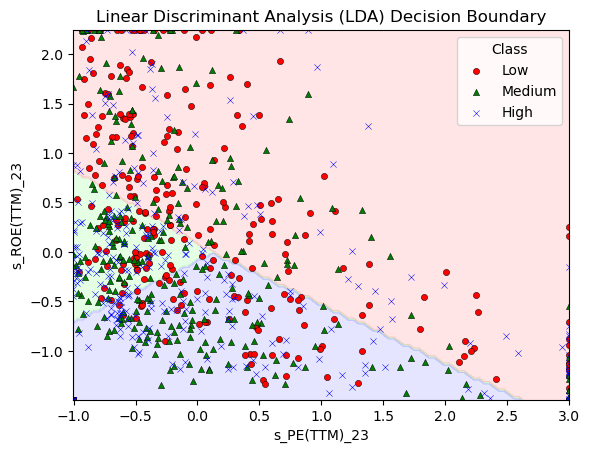

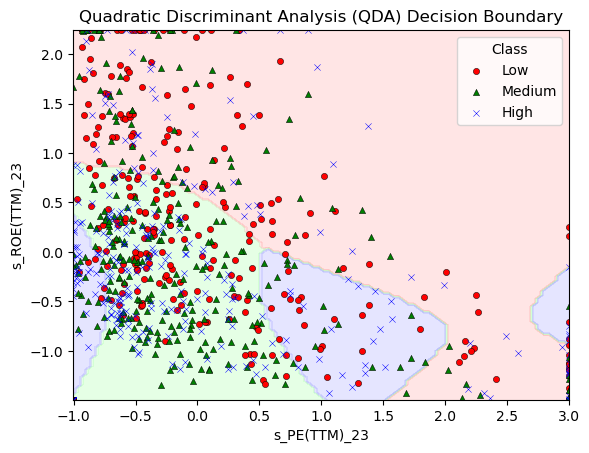

In [33]:
# Step 1: 定义类别：将 Ret_24 分为三类
ret_24_quantiles = data['Ret_24'].quantile([1/3, 2/3])
data['Y'] = np.where(data['Ret_24'] <= ret_24_quantiles.iloc[0], 0,
                     np.where(data['Ret_24'] <= ret_24_quantiles.iloc[1], 1, 2))

# Step 2: 选择自变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23']].values
y = data['Y'].values

def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # 预测网格中的每个点
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    
    # 设置不同类别的标记样式
    markers = ['o', '^', 'x']
    colors = ['red', 'green', 'blue']
    labels = ['Low', 'Medium', 'High']
    
    for i, marker in enumerate(markers):
        sns.scatterplot(x=X[y == i, 0], y=X[y == i, 1], label=labels[i], 
                        edgecolor="k", marker=marker, color=colors[i], s=20)
    
    plt.xlabel('s_PE(TTM)_23')
    plt.ylabel('s_ROE(TTM)_23')
    plt.title(title)
    plt.legend(title='Class')
    plt.show()

# Step 3: 训练 LDA 模型并绘制决策边界
lda_model = LDA()
lda_model.fit(X, y)
plot_decision_boundary(lda_model, X, y, "Linear Discriminant Analysis (LDA) Decision Boundary")

# Step 4: 训练 QDA 模型并绘制决策边界
qda_model = QDA()
qda_model.fit(X, y)
plot_decision_boundary(qda_model, X, y, "Quadratic Discriminant Analysis (QDA) Decision Boundary")

### SVM支持向量机
任何一个 P 维物体（空间）都可以被一个 P-1 维的超平面分成两部分。对于一个 P 维空间，x1+x2+…+xP=b 就是一个超平面， b 是一个常数。 支持向量分类器的核心思路就是用一个
这样的超平面划分样本空间，从而解决分类问题。

#### 支持向量机（SVM）的基本思想：
SVM核心思想是“**超平面分类**”和“**引入更多的维度**”来找到最佳分类边界。与普通线性分类器不同的是，支持向量机通过**核方法**来计算超平面，以适应线性不可分的数据。

常见的核函数包括：**线性核** **多项式核** **高斯核** 


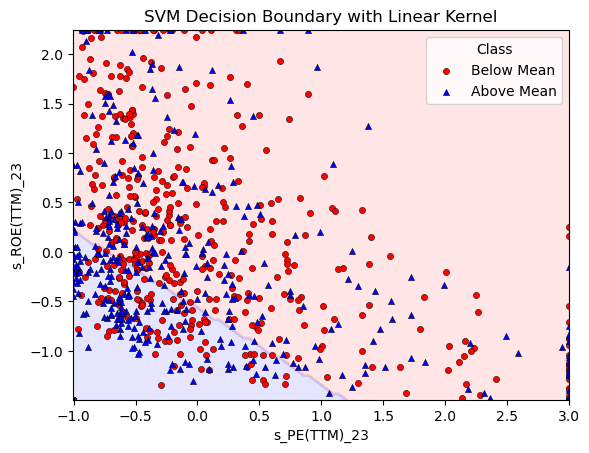

In [35]:
# Step 1: 定义类别
# 计算 Ret_24 的均值，将其大于均值的部分标记为 1，小于或等于均值的部分标记为 0
ret_24_mean = data['Ret_24'].mean()
data['Y'] = (data['Ret_24'] > ret_24_mean).astype(int)

# Step 2: 选择自变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23']].values
y = data['Y'].values

# Step 3: 训练 SVM 模型
svm_model = SVC(kernel='linear', C=1.0)  # 使用线性核
svm_model.fit(X, y)

# Step 4: 绘制决策边界函数
def plot_decision_boundary(model, X, y, title):
    x_min, x_max = X[:, 0].min(), X[:, 0].max()
    y_min, y_max = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # 预测网格中的每个点
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    
    # 绘制样本点
    markers = ['o', '^']
    colors = ['red', 'blue']
    labels = ['Below Mean', 'Above Mean']
    
    for i, marker in enumerate(markers):
        sns.scatterplot(x=X[y == i, 0], y=X[y == i, 1], label=labels[i], 
                        edgecolor="k", marker=marker, color=colors[i], s=20)
    
    plt.xlabel('s_PE(TTM)_23')
    plt.ylabel('s_ROE(TTM)_23')
    plt.title(title)
    plt.legend(title='Class')
    plt.show()

# Step 5: 绘制 SVM 决策边界
plot_decision_boundary(svm_model, X, y, "SVM Decision Boundary with Linear Kernel")

### Decision Tree and Random Forest
节点分裂的原则是使得节点分裂后的信息增益（information gain）最大。

单棵决策树的预测能力有限，如何将多个弱分类器组合成一个强分类器，这是分类器集成需要探讨的问题。分类器集成算法有两大渊薮,一支为 Bagging 系列（并行方法），右边一支为 Boosting 系列（串行方法）。对于多棵决策树，如果以 Bagging 的方式组合起来，可以得到随机森林算法；如果以 Boosting 的方式组合起来，可以得到梯度提升决策树（GBDT）等方法。这一部分我们将首先介绍 Bagging 方法。

**Bagging 方法是 Bootstrap 思想在机器学习上的应用**。我们由原始数据集生成 N 个 Bootstrap 数据集，对于每个 Bootstrap 数据集分别训练一个弱分类器， 最终用**投票（分类）、 取平均值（回归）**等方法组合成强分类器。具体而言，**随机森林** 算法根据以下两步方法建造每棵决策树。第一步称为 **“行采样”**，从全体训练样本中有放回地
抽样，得到一个 Bootstrap 数据集。第二步称为 **“列采样”**，从全部 M 个特征中随机选择 m 个特征（m 小于 M），以 Bootstrap 数据集的 m 个特征为新的训练集，训练一棵决策树。最终将全部 N 棵决策树以投票的方式组合。

### AdaBoost
和 Bagging 并行组合弱分类器的思想不同， **AdaBoost（adaptive boosting）将弱分类器以串行的方式组合起来。** AdaBoost中的弱分类器可以是任何机器学习分类算法。

在训练之前，我们赋予全部样本相等的权重。
· 第一步以原始数据为训练集，训练一个弱分类器 C1。 对于分类错误的样本， 提高其权重，第二步以更新样本权值后的数据为训练集，再次训练一个弱分类器C2。
· 随后重复上述过程，每次自适应地改变样本权重并训练弱分类器。
· 最终，每个弱分类器都可以计算出它的加权训练样本分类错误率，将全部弱分类器按一定权值进行组合得到强分类器，错误率越低的弱分类器所占权重越高。

**AdaBoost 提高了分类错误样本的权重， 因而对极端样本更为敏感，可能会造成过拟合的问题。**

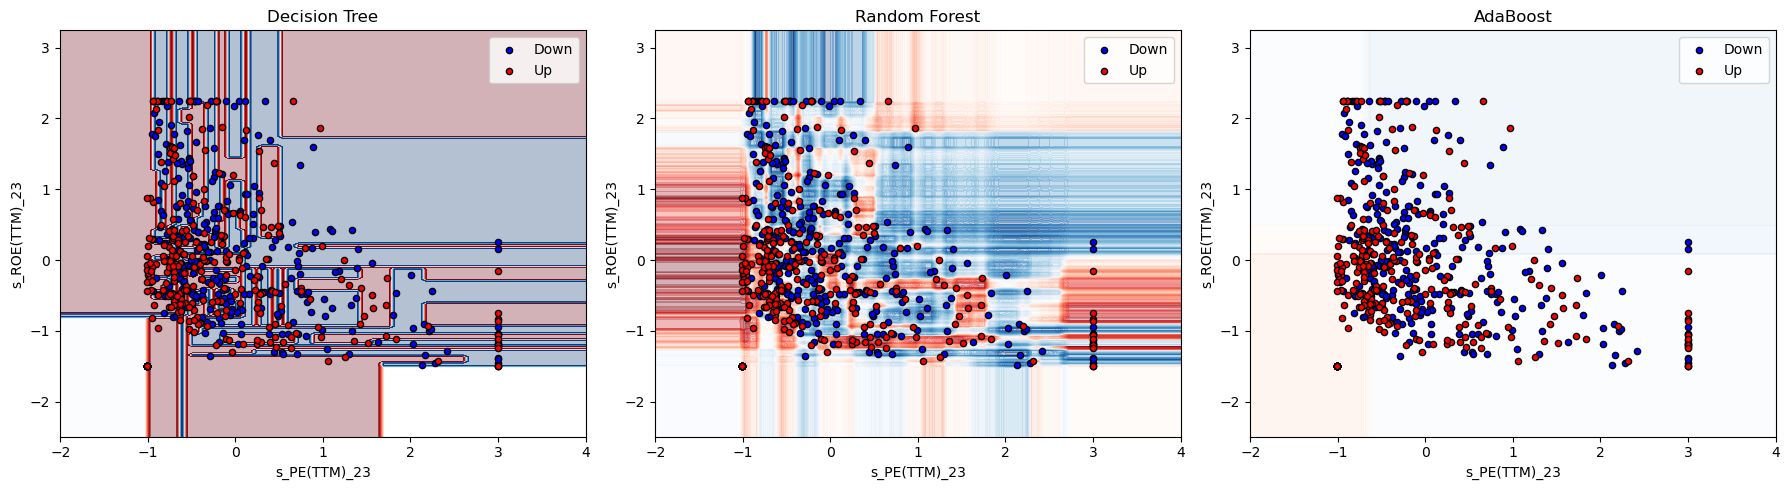

In [37]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

# 自变量和因变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23']].values
Y = data['Ret_24_above_mean'].values  # 目标变量（0, 1）

# 拆分数据集为训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 创建分类器
classifiers = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "AdaBoost": AdaBoostClassifier(n_estimators=10, learning_rate=0.1, random_state=42)
}

# 设置渐变颜色映射
cmap_red = plt.cm.Reds  # 用于上涨概率的渐变色
cmap_blue = plt.cm.Blues  # 用于下跌概率的渐变色

# 绘制决策边界函数（带渐变颜色）
def plot_decision_boundary_with_gradient(model, X, Y, ax, title):
    # 确定网格范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 200))
    
    # 获取每个点的预测概率
    if hasattr(model, "predict_proba"):  # 检查模型是否支持概率预测
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # 类别 1 的概率（上涨）
        Z = Z.reshape(xx.shape)
        
        # 绘制渐变色区域
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_red, levels=np.linspace(0.5, 1, 50))
        ax.contourf(xx, yy, 1 - Z, alpha=0.3, cmap=cmap_blue, levels=np.linspace(0.5, 1, 50))
    else:
        print(f"Model {title} does not support predict_proba.")

    # 绘制训练样本点
    ax.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='blue', label='Down', edgecolor="k", s=20)
    ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Up', edgecolor="k", s=20)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('s_PE(TTM)_23')
    ax.set_ylabel('s_ROE(TTM)_23')
    ax.set_title(title)
    ax.legend()

# 绘制决策树、随机森林、AdaBoost 的决策边界
fig, axs = plt.subplots(1, 3, figsize=(18, 5))
for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, Y_train)
    plot_decision_boundary_with_gradient(clf, X_train, Y_train, axs[i], title=name)

plt.tight_layout()
plt.show()

### 梯度提升决策树（GBDT） 和 XGBoost 
GBDT 和 XGBoost 都是基于梯度提升的算法。XGBoost 在 GBDT 的基础上增加了正则化、并行化和优化处理，使其在大规模数据上更高效。
AdaBoost 则是一种较简单的提升方法，适用于低噪声数据，并通过调整样本权重关注难分类样本。相比 GBDT 和 XGBoost，AdaBoost 对噪声更加敏感。

GBDT 的核心思想是通过逐步减小模型的损失来改进模型，每棵新树是为了拟合前一步的残差。在训练新树时，我们将已有的树模型预测值与真实值之间的残差作为新树的目标值，而不再是原始的y。训练新的决策树让它学会预测这些残差，找到当前树模型的不足之处，并预测出这些不足的部分。

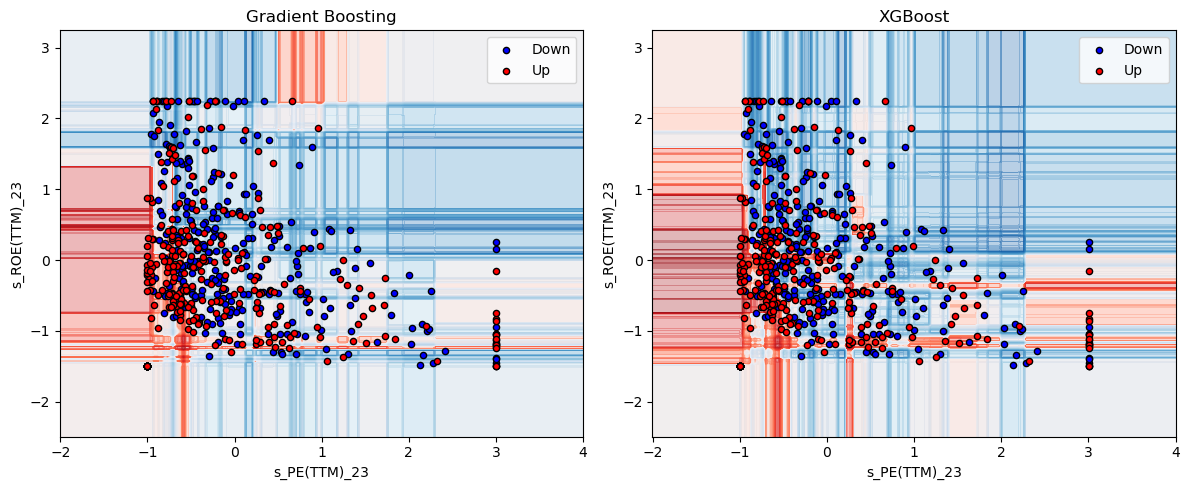

In [39]:
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# 自变量和因变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23']].values
Y = data['Ret_24_above_mean'].values  # 目标变量（0, 1）

# 拆分数据集为训练集和测试集
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# 创建 GBDT 和 XGBoost 分类器
classifiers = {
    "Gradient Boosting": GradientBoostingClassifier(n_estimators=100, learning_rate=0.05, random_state=42),
    "XGBoost": XGBClassifier(n_estimators=100, learning_rate=0.05, use_label_encoder=False, eval_metric='logloss', random_state=42)
}

# 设置渐变颜色映射
cmap_red = plt.cm.Reds  # 用于上涨概率的渐变色
cmap_blue = plt.cm.Blues  # 用于下跌概率的渐变色

# 绘制决策边界函数（带渐变颜色）
def plot_decision_boundary_with_gradient(model, X, Y, ax, title):
    # 确定网格范围
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 200), np.linspace(y_min, y_max, 200))
    
    # 获取每个点的预测概率
    if hasattr(model, "predict_proba"):  # 检查模型是否支持概率预测
        Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]  # 类别 1 的概率（上涨）
        Z = Z.reshape(xx.shape)
        
        # 绘制渐变色区域
        ax.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_red, levels=np.linspace(0.4, 1, 100))
        ax.contourf(xx, yy, 1 - Z, alpha=0.3, cmap=cmap_blue, levels=np.linspace(0.4, 1, 100))
    else:
        print(f"Model {title} does not support predict_proba.")

    # 绘制训练样本点
    ax.scatter(X[Y == 0][:, 0], X[Y == 0][:, 1], color='blue', label='Down', edgecolor="k", s=20)
    ax.scatter(X[Y == 1][:, 0], X[Y == 1][:, 1], color='red', label='Up', edgecolor="k", s=20)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('s_PE(TTM)_23')
    ax.set_ylabel('s_ROE(TTM)_23')
    ax.set_title(title)
    ax.legend()

# 绘制 GBDT 和 XGBoost 的决策边界
fig, axs = plt.subplots(1, 2, figsize=(12, 5))
for i, (name, clf) in enumerate(classifiers.items()):
    clf.fit(X_train, Y_train)
    plot_decision_boundary_with_gradient(clf, X_train, Y_train, axs[i], title=name)

plt.tight_layout()
plt.show()


### KNN算法

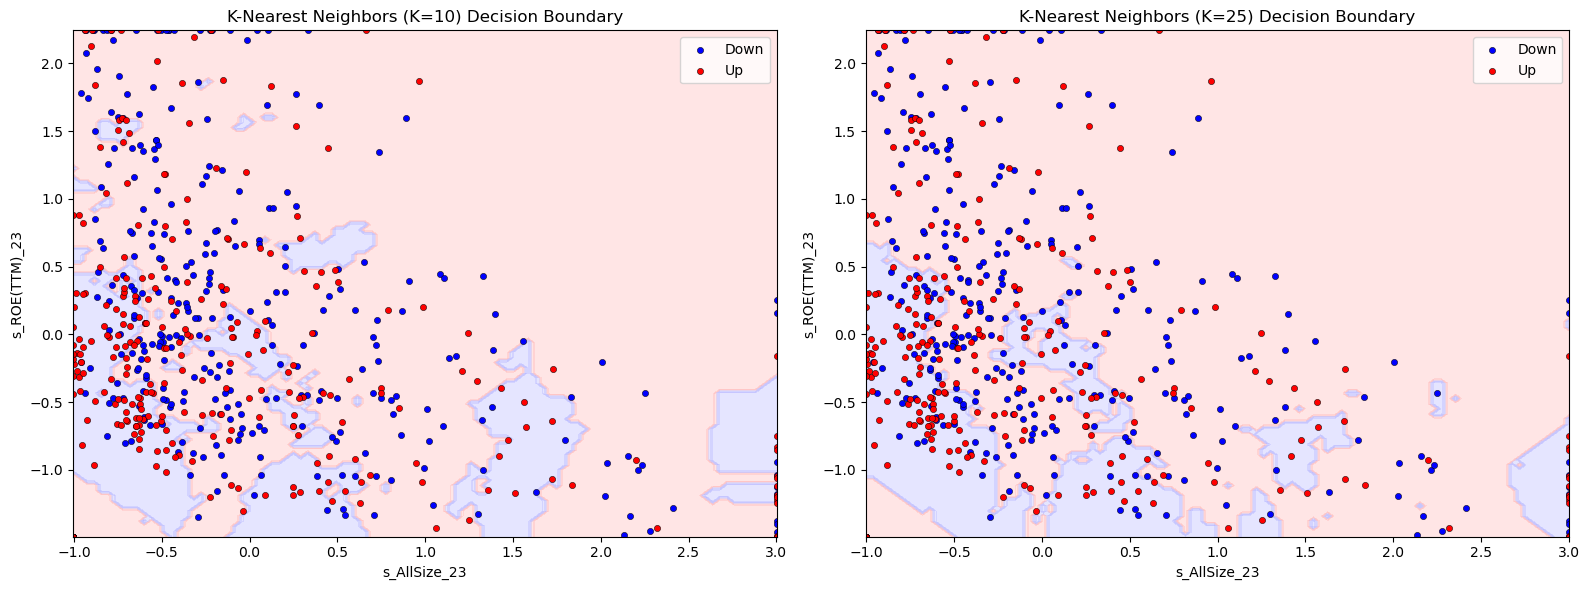

In [41]:
from sklearn.neighbors import KNeighborsClassifier

# 自变量和因变量
X = data[['s_AllSize_23', 's_ROE(TTM)_23']].values
Y = data['Ret_24_above_mean'].values  # 目标变量（0, 1）

# 设置两个不同的 K 值
k_values = [10, 25]
models = [KNeighborsClassifier(n_neighbors=k) for k in k_values]

# 训练每个 KNN 模型
for model in models:
    model.fit(X_train, Y_train)

# 绘制决策边界函数
def plot_decision_boundary(model, X, Y, ax, title):
    # 确定网格范围
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # 预测网格中的每个点
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAAAFF']))
    
    # 绘制样本点
    sns.scatterplot(x=X[Y == 0][:, 0], y=X[Y == 0][:, 1], color='blue', label='Down', edgecolor="k", s=20, ax=ax)
    sns.scatterplot(x=X[Y == 1][:, 0], y=X[Y == 1][:, 1], color='red', label='Up', edgecolor="k", s=20, ax=ax)
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('s_AllSize_23')
    ax.set_ylabel('s_ROE(TTM)_23')
    ax.set_title(title)
    ax.legend()

# 并列绘制两个决策边界
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for ax, model, k in zip(axs, models, k_values):
    plot_decision_boundary(model, X_train, Y_train, ax, title=f"K-Nearest Neighbors (K={k}) Decision Boundary")

plt.tight_layout()
plt.show()

### K-means 聚类，clustering

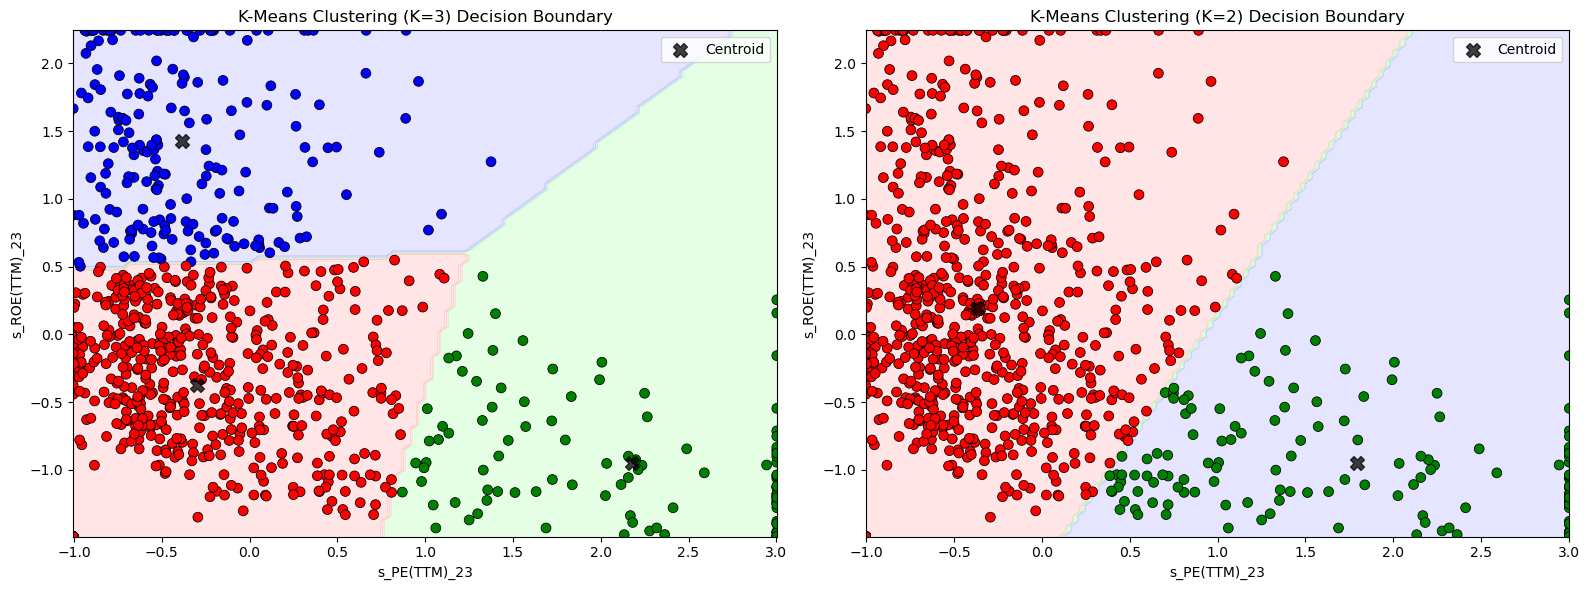

In [43]:
from sklearn.cluster import KMeans
# 自变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23']].values

# 设置不同的 K 值
k_values = [3, 2]
models = [KMeans(n_clusters=k, random_state=42) for k in k_values]

# 训练每个 KMeans 模型
for model in models:
    model.fit(X)

# 绘制决策边界函数
def plot_decision_boundary_kmeans(model, X, ax, title):
    # 确定网格范围
    x_min, x_max = X[:, 0].min(), X[:, 0].max() 
    y_min, y_max = X[:, 1].min(), X[:, 1].max() 
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    # 预测网格中的每个点
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界
    ax.contourf(xx, yy, Z, alpha=0.3, cmap=ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF']))
    
    # 绘制样本点
    sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=model.predict(X), palette=['red', 'green', 'blue'], 
                    edgecolor="k", s=50, ax=ax, legend=None)
    
    # 绘制簇中心
    centers = model.cluster_centers_
    ax.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.75, marker='X', label='Centroid')
    
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('s_PE(TTM)_23')
    ax.set_ylabel('s_ROE(TTM)_23')
    ax.set_title(title)
    ax.legend()

# 并列绘制两个 KMeans 决策边界
fig, axs = plt.subplots(1, 2, figsize=(16, 6))
for ax, model, k in zip(axs, models, k_values):
    plot_decision_boundary_kmeans(model, X, ax, title=f"K-Means Clustering (K={k}) Decision Boundary")

plt.tight_layout()
plt.show()

### PCA主成分分析
本质来源于协方差矩阵的特征值分解，前N个主成分的线性组合系数对应了前N个特征向量的值，前N个主成分解释的方差占比为前N个特征值之和占所有特征值之和的占比。
主成分分析背
后的假设是样本特征变化最剧烈的部分与因变量变化最剧烈的部分是一致的。

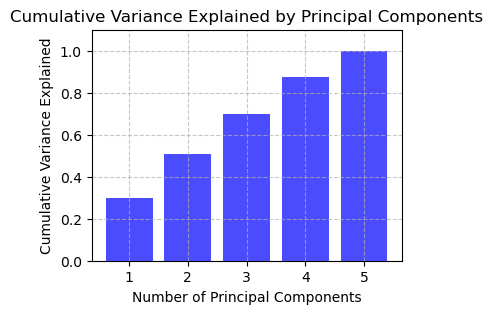

In [45]:
from sklearn.decomposition import PCA

# 自变量
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23', 's_Predict_PEG_23', 's_AllSize_23', 's_Cash_payout_23']].values

# 进行PCA
pca = PCA()
pca.fit(X)

# 获取每个主成分的解释方差占比和累计解释方差占比
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

# 绘制累计解释方差占比的条形图
plt.figure(figsize=(4, 3))
plt.bar(range(1, len(cumulative_explained_variance) + 1), cumulative_explained_variance, alpha=0.7, color='b')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by Principal Components')
plt.xticks(range(1, len(cumulative_explained_variance) + 1))
plt.ylim(0, 1.1)  # 将 y 轴范围设置为 0 到 1.1，以便更清晰地展示累计方差
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

### 偏最小二乘法（partial least squares， PLS）
在样本特征变化剧烈的部分与因变量变化剧烈的部分关系不大时，考虑用PLS而并非PCA

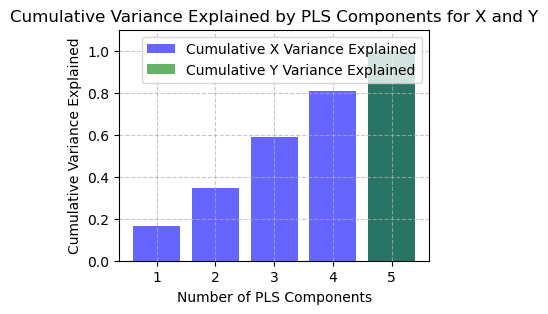

In [47]:
from sklearn.cross_decomposition import PLSRegression
from sklearn.preprocessing import StandardScaler

# 自变量 X 和因变量 Y
X = data[['s_PE(TTM)_23', 's_ROE(TTM)_23', 's_Predict_PEG_23', 's_AllSize_23', 's_Cash_payout_23']].values
Y = data['Ret_24_above_mean'].values.reshape(-1, 1)  # 目标变量（0 或 1）

# 进行 PLS 回归并降维
n_components = min(X.shape[1], Y.shape[0])  # 最大主成分数量
pls = PLSRegression(n_components=n_components)
pls.fit(X, Y)

# 获取解释方差占比
X_variance_ratio = np.var(pls.transform(X), axis=0) / np.sum(np.var(pls.transform(X), axis=0))
Y_variance_ratio = np.var(pls.y_scores_, axis=0) / np.sum(np.var(pls.y_scores_, axis=0))
cumulative_X_variance_ratio = np.cumsum(X_variance_ratio)
cumulative_Y_variance_ratio = np.cumsum(Y_variance_ratio)

# 绘制累计解释方差占比的条形图
plt.figure(figsize=(4, 3))

# X 的累计解释方差占比
plt.bar(range(1, len(cumulative_X_variance_ratio) + 1), cumulative_X_variance_ratio, 
        alpha=0.6, label='Cumulative X Variance Explained', color='blue')

# Y 的累计解释方差占比
plt.bar(range(1, len(cumulative_Y_variance_ratio) + 1), cumulative_Y_variance_ratio, 
        alpha=0.6, label='Cumulative Y Variance Explained', color='green')

plt.xlabel('Number of PLS Components')
plt.ylabel('Cumulative Variance Explained')
plt.title('Cumulative Variance Explained by PLS Components for X and Y')
plt.xticks(range(1, len(cumulative_X_variance_ratio) + 1))
plt.ylim(0, 1.1)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()